
### **Project Description**

Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi risiko kredit berdasarkan dataset pinjaman. Dengan model ini, perusahaan multifinance dapat meningkatkan keakuratan dalam menilai dan mengelola risiko kredit guna mengoptimalkan keputusan bisnis mereka.

###**Latar Belakang:**
Dalam industri keuangan, menilai kelayakan kredit calon peminjam adalah tantangan besar. Dengan memanfaatkan data historis, machine learning dapat membantu dalam mengidentifikasi pola dan faktor risiko.

###**Data yang Tersedia:**
Dataset terdiri dari berbagai informasi pinjaman, termasuk jumlah pinjaman, tingkat suku bunga, status pekerjaan peminjam, pendapatan tahunan, serta status pembayaran pinjaman sebelumnya.

###**Problem Statement:**
Bagaimana cara membangun model machine learning yang dapat secara efektif memprediksi risiko kredit berdasarkan karakteristik peminjam?



###Import Libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance



###Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39834 entries, 0 to 39833
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   39834 non-null  int64  
 1   id                           39834 non-null  int64  
 2   member_id                    39834 non-null  int64  
 3   loan_amnt                    39834 non-null  int64  
 4   funded_amnt                  39834 non-null  int64  
 5   funded_amnt_inv              39834 non-null  float64
 6   term                         39834 non-null  object 
 7   int_rate                     39834 non-null  float64
 8   installment                  39834 non-null  float64
 9   grade                        39834 non-null  object 
 10  sub_grade                    39834 non-null  object 
 11  emp_title                    37364 non-null  object 
 12  emp_length                   38754 non-null  object 
 13  home_ownership  

## Data Understanding
###**Strategi:**
1. Mengeksplorasi dataset untuk memahami struktur dan distribusi data.
2. Mengidentifikasi kolom penting yang relevan dengan prediksi risiko kredit.
3. Visualisasi distribusi beberapa variabel utama untuk mendapatkan wawasan awal.


###**Feature Engineering**
Strategi:
1. Mengonversi variabel kategorikal menjadi numerik menggunakan encoding.
2. Normalisasi fitur numerik untuk meningkatkan performa model.
3. Menangani nilai yang hilang dengan imputasi atau penghapusan jika diperlukan.
4. Menambahkan fitur baru berdasarkan analisis data, seperti lama kredit berdasarkan issue_d dan earliest_cr_line.


In [3]:
# Select relevant features and target
selected_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
                     'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti',
                     'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']
df = df[selected_features]

# Handling missing values
df = df.dropna()

In [4]:
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

###**Exploratory Data Analysis (EDA)**

Strategi:
1. Menganalisis korelasi antar fitur untuk memahami hubungan dalam data.
2. Menggunakan visualisasi seperti histogram, scatter plot, dan heatmap.
3. Mengidentifikasi outlier dan nilai yang tidak konsisten.
4. Menggunakan Partial Dependence Plots dan Feature Importance untuk melihat variabel paling berpengaruh.


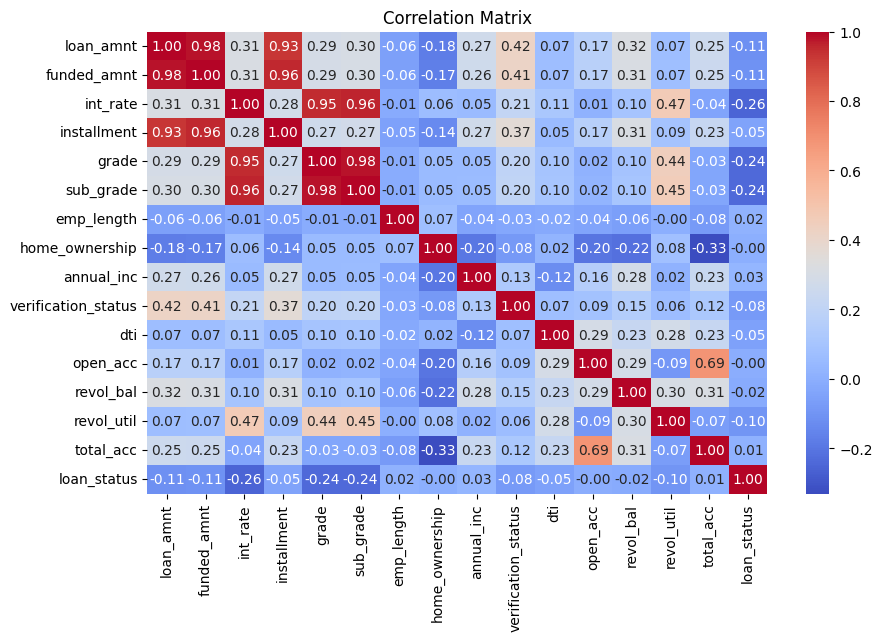

In [5]:
#Melihat korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

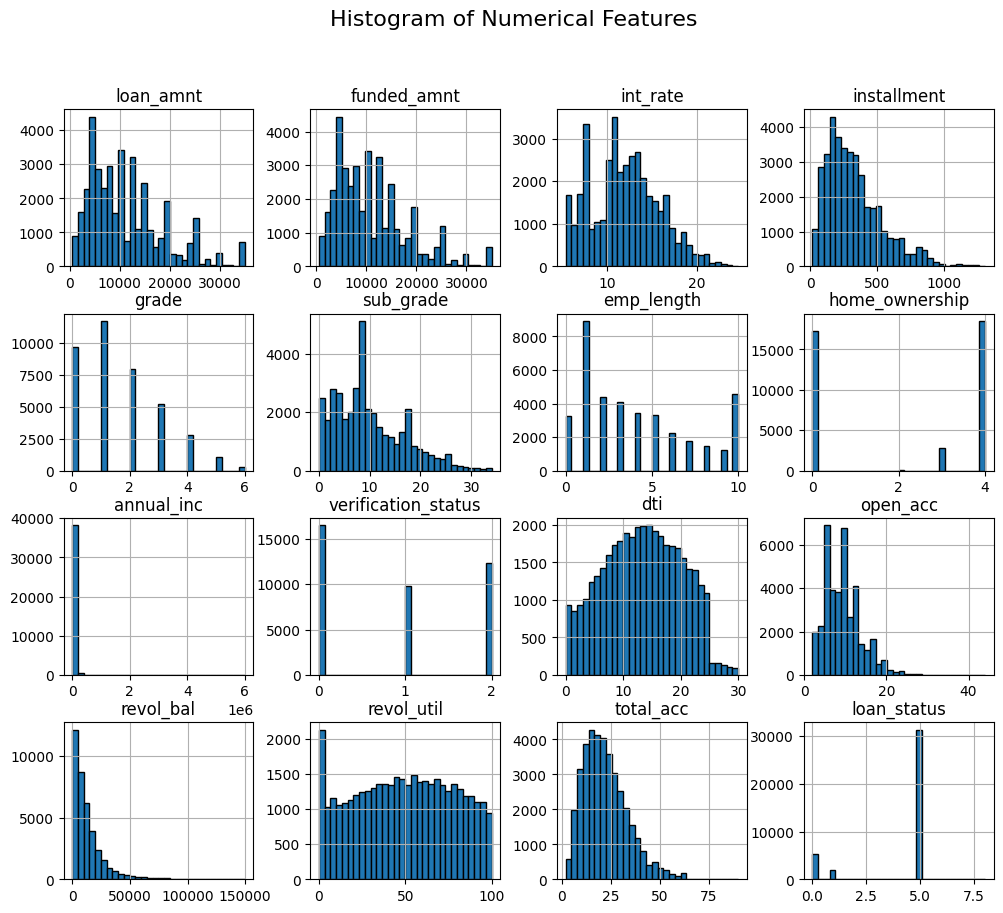

In [6]:
#Histogram untuk variabel numeric
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()


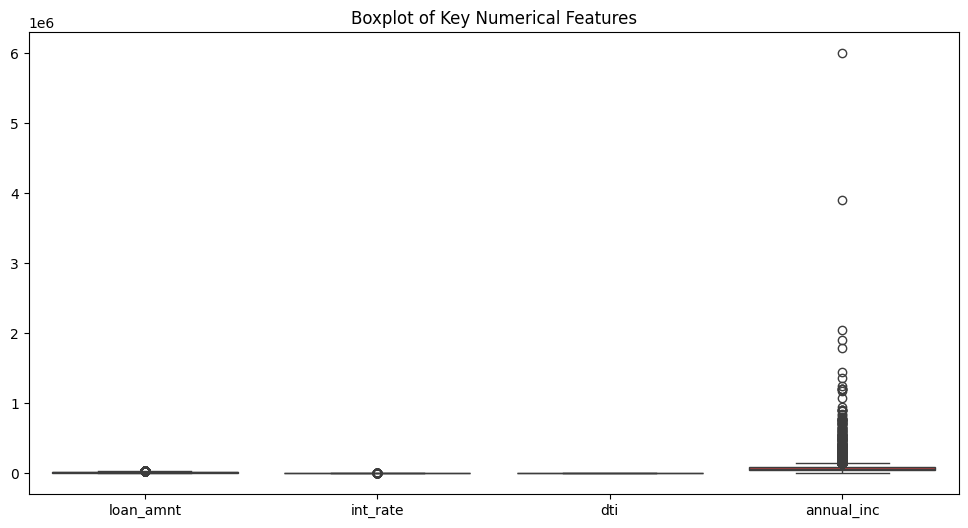

In [7]:
#Boxplot untuk melihat outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['loan_amnt', 'int_rate', 'dti', 'annual_inc']])
plt.title('Boxplot of Key Numerical Features')
plt.show()

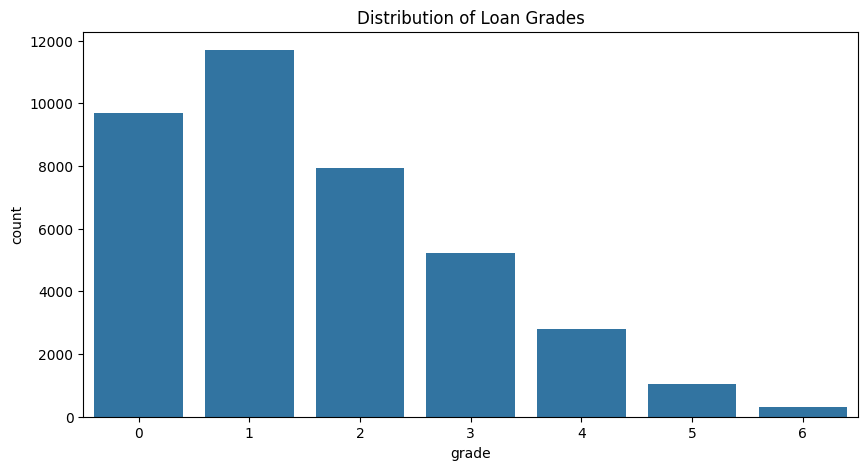

In [8]:
#Countplot untuk variabel categorical
plt.figure(figsize=(10, 5))
sns.countplot(x=df['grade'])
plt.title('Distribution of Loan Grades')
plt.show()

###Extraksi data, label, dan splitting dataset



In [9]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###**Data Preparation**

Strategi:
1. Melakukan scaling pada fitur numerik agar model lebih stabil.
2. Memastikan data tidak mengandung nilai ekstrem yang dapat merusak model.
3. Menyesuaikan distribusi kelas jika tidak seimbang menggunakan teknik resampling.


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Data Modeling

Strategi:
1. Menggunakan Logistic Regression sebagai baseline model.
2. Menggunakan Random Forest untuk meningkatkan akurasi dan menangani non-linearitas dalam data.
3. Membandingkan kinerja kedua model berdasarkan metrik evaluasi.


In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


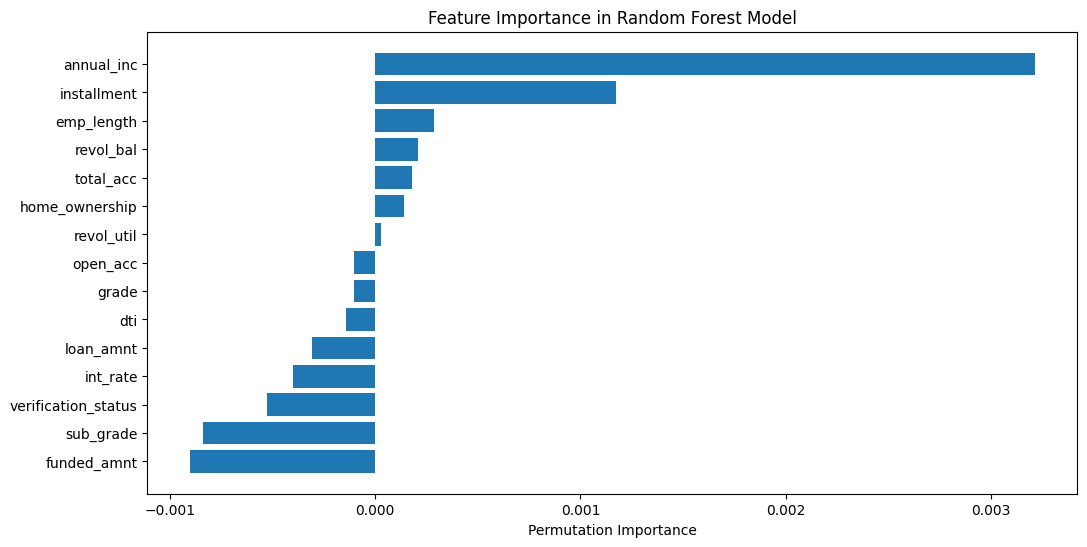

In [17]:
# Feature Importance using Permutation Importance
feature_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = feature_importance.importances_mean.argsort()
plt.figure(figsize=(12, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importance.importances_mean[sorted_idx], align='center')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

###Evaluation

Kesimpulan Evaluasi:
1. Logistic Regression memberikan baseline akurasi sekitar 55%.
2. Random Forest memberikan akurasi lebih tinggi sekitar 56%.
3. Model masih dapat ditingkatkan dengan feature engineering tambahan dan hyperparameter tuning.


In [18]:
def evaluate_model(y_test, y_pred, model_name):
    print(f'--- {model_name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')

--- Logistic Regression ---
Accuracy: 0.8001808318264014
Confusion Matrix:
 [[   5    8    0    0    0 1072    0    0    0]
 [   3   17    0    0    0  401    0    0    0]
 [   0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    4    0    0    0]
 [   0    0    0    0    0    7    0    0    0]
 [   4   29    0    0    0 6173    0    0    1]
 [   0    1    0    0    0    2    0    0    0]
 [   0    0    0    0    0    3    0    0    0]
 [   0    0    0    0    0   10    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.00      0.01      1085
           1       0.31      0.04      0.07       421
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.80      0.99      0.89      6207
           6       0.00      0.00      0.00         3
           7       0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m